In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.metrics import BinaryAccuracy,FalsePositives,FalseNegatives,TruePositives,TrueNegatives,Precision,Recall,AUC

In [3]:
import segmentation_models as sm

sm.set_framework('tf.keras')

sm.framework()

Segmentation Models: using `keras` framework.


'tf.keras'

In [4]:
import os

In [5]:
train_dir = 'trainimages'
test_dir = 'trainimages'
train_df = pd.read_csv('final.csv')
train_df

,imageName,isDay
0,image_0.jpg,1
1,image_1.jpg,1
2,image_10.jpg,1
3,image_11.jpg,1
4,image_12.jpg,1
...,...,...
95,image_145.jpg,0
96,image_146.jpg,0
97,image_147.jpg,0
98,image_148.jpg,0


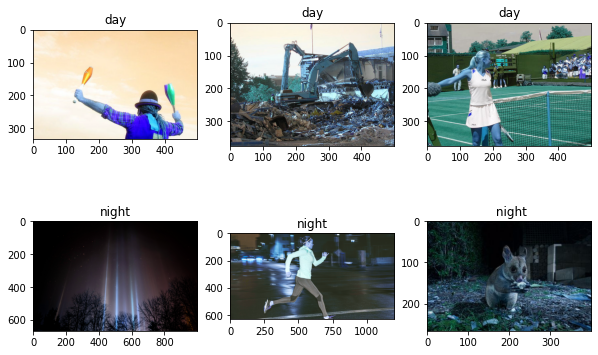

In [6]:
import cv2
Day = []
Day.append(cv2.imread(train_dir + '/' + train_df['imageName'][0]))
Day.append(cv2.imread(train_dir + '/' + train_df['imageName'][1]))
Day.append(cv2.imread(train_dir + '/' + train_df['imageName'][2]))
#now reading light images
Day.append(cv2.imread(train_dir + '/' + train_df['imageName'][97]))
Day.append(cv2.imread(train_dir + '/' + train_df['imageName'][98]))
Day.append(cv2.imread(train_dir + '/' + train_df['imageName'][99]))


labels = ['day','day','day','night','night',' night']

import matplotlib.pyplot as plt

plt.figure(figsize=[10,10])
for x in range(0,6):
    plt.subplot(3, 3,x+1)
    plt.imshow(Day[x])
    plt.title(labels[x])
    x += 1
    
plt.show()

In [7]:
from keras import applications
from efficientnet.keras import EfficientNetB3
from keras import callbacks
from keras.models import Sequential

In [8]:
# train_df['isDay'] = train_df['isDay'].astype('str')

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.10,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# it=train_datagen.flow(samples.batch_size=1)

train_generator = train_datagen.flow_from_directory(
    "C:/Users/Tushar/OneDrive/Desktop/Tushar/train",
#     x_col="imageName",
#     y_col="isDay",
#     subset="training",
    target_size=(32,32),
    batch_size=5,
    shuffle=True,
    class_mode="binary"
)

val_generator = train_datagen.flow_from_directory(
    "C:/Users/Tushar/OneDrive/Desktop/Tushar/test",
#     x_col="imageName",
#     y_col="isDay",
    target_size=(32,32),
#     subset="validation",
    batch_size=1,
    shuffle=True,
    class_mode="binary"
)

Found 70 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [10]:
# traindf2=train_df
# inp=[]
# labels=[]
# for x,y in traindf2.to_numpy():
#     labels.append(y)
#     inp.append(x)
    
# # labels=np.array ([i[0] for i in labels])
# # for x,y in traindf2.to_numpy():
# #     inp.append

In [11]:
from keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.optimizers import Adam 
 

efficient_net=tf.keras.applications.efficientnet.EfficientNetB3(
    weights='imagenet',
    input_shape=(32,32,3),
    include_top=False,
    pooling='max'
)
model = Sequential()
model.add(efficient_net)
model.add(Dense(units = 120, activation='relu'))
model.add(Dense(units = 120, activation = 'relu'))
model.add(Dense(units = 1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 1536)             10783535  
                                                                 
 dense (Dense)               (None, 120)               184440    
                                                                 
 dense_1 (Dense)             (None, 120)               14520     
                                                                 
 dense_2 (Dense)             (None, 1)                 121       
                                                                 
Total params: 10,982,616
Trainable params: 10,895,313
Non-trainable params: 87,303
_________________________________________________________________


In [12]:
labels

['day', 'day', 'day', 'night', 'night', ' night']

In [13]:
metrics=[TruePositives(name='tp'),FalsePositives(name='fp'),TrueNegatives(name='tn'),FalseNegatives(name='fn'),BinaryAccuracy(name='accuracy'),Precision(name='precision'),Recall(name='recall'),AUC(name='auc')]
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=metrics)

In [14]:
history = model.fit(
    train_generator,
    epochs = 50,
    steps_per_epoch = 14,
    validation_data = val_generator,
    validation_steps = 7
)

Epoch 1/50
14/14 [==============================] - 42s 707ms/step - loss: 0.6981 - tp: 6.0000 - fp: 5.0000 - tn: 30.0000 - fn: 29.0000 - accuracy: 0.5143 - precision: 0.5455 - recall: 0.1714 - auc: 0.6127 - val_loss: 0.7145 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 3.0000 - val_fn: 4.0000 - val_accuracy: 0.4286 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 2/50
14/14 [==============================] - 4s 257ms/step - loss: 0.6895 - tp: 10.0000 - fp: 7.0000 - tn: 28.0000 - fn: 25.0000 - accuracy: 0.5429 - precision: 0.5882 - recall: 0.2857 - auc: 0.5727 - val_loss: 0.7198 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 3.0000 - val_fn: 4.0000 - val_accuracy: 0.4286 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 3/50
14/14 [==============================] - 4s 248ms/step - loss: 0.7288 - tp: 9.0000 - fp: 8.0000 - tn: 27.0000 - fn: 26.0000 - accuracy: 0.5143 - precision: 0.5294 - recall: 0.2571 - auc: 0.4461 - val

Epoch 22/50
14/14 [==============================] - 4s 289ms/step - loss: 0.7075 - tp: 10.0000 - fp: 10.0000 - tn: 25.0000 - fn: 25.0000 - accuracy: 0.5000 - precision: 0.5000 - recall: 0.2857 - auc: 0.4939 - val_loss: 0.6701 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 4.0000 - val_fn: 3.0000 - val_accuracy: 0.5714 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7083
Epoch 23/50
14/14 [==============================] - 4s 290ms/step - loss: 0.7045 - tp: 12.0000 - fp: 12.0000 - tn: 23.0000 - fn: 23.0000 - accuracy: 0.5000 - precision: 0.5000 - recall: 0.3429 - auc: 0.5359 - val_loss: 0.6877 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 4.0000 - val_fn: 3.0000 - val_accuracy: 0.5714 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4583
Epoch 24/50
14/14 [==============================] - 4s 258ms/step - loss: 0.6914 - tp: 13.0000 - fp: 10.0000 - tn: 25.0000 - fn: 22.0000 - accuracy: 0.5429 - precision: 0.5652 - recall: 0.3714 - auc: 0.571

Epoch 43/50
14/14 [==============================] - 4s 255ms/step - loss: 0.6650 - tp: 17.0000 - fp: 9.0000 - tn: 26.0000 - fn: 18.0000 - accuracy: 0.6143 - precision: 0.6538 - recall: 0.4857 - auc: 0.6384 - val_loss: 0.6091 - val_tp: 2.0000 - val_fp: 0.0000e+00 - val_tn: 4.0000 - val_fn: 1.0000 - val_accuracy: 0.8571 - val_precision: 1.0000 - val_recall: 0.6667 - val_auc: 1.0000
Epoch 44/50
14/14 [==============================] - 4s 296ms/step - loss: 0.6300 - tp: 19.0000 - fp: 7.0000 - tn: 28.0000 - fn: 16.0000 - accuracy: 0.6714 - precision: 0.7308 - recall: 0.5429 - auc: 0.7563 - val_loss: 0.7708 - val_tp: 0.0000e+00 - val_fp: 1.0000 - val_tn: 1.0000 - val_fn: 5.0000 - val_accuracy: 0.1429 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.1000
Epoch 45/50
14/14 [==============================] - 4s 291ms/step - loss: 0.6590 - tp: 21.0000 - fp: 14.0000 - tn: 21.0000 - fn: 14.0000 - accuracy: 0.6000 - precision: 0.6000 - recall: 0.6000 - auc: 0.6335 - val_loss: 0.70

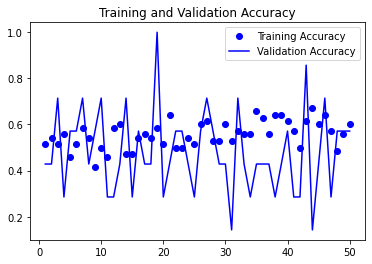

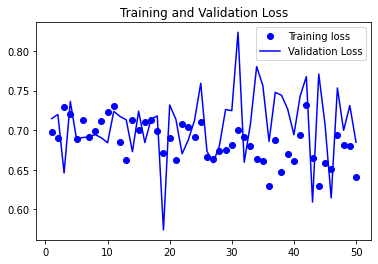

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)

plt.plot(epochs,acc,'bo',label = 'Training Accuracy')
plt.plot(epochs,val_acc,'b',label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [16]:
preds = model.predict(
    val_generator,
    steps=len(val_generator.filenames)
)

# def predictImage(filename):
#     img1 = image.load_img(filename,target_size=(150,150))
    
#     plt.imshow(img1)
 
#     Y = image.img_to_array(img1)
    
#     X = np.expand_dims(Y,axis=0)
#     val = model.predict(X)
#     print(val)
#     if val == 1:
        
#         plt.xlabel("night",fontsize=30)
        
    
#     elif val == 0:
        
#         plt.xlabel("day",fontsize=30)

In [17]:
print(np.round_(preds))

[[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]]


# Simple Binary Classifier


In [21]:
import shutil
import cv2
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from tensorflow.keras.preprocessing import image
import keras
import matplotlib.pyplot as plt

In [22]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("C:/Users/Tushar/OneDrive/Desktop/Tushar/train",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("C:/Users/Tushar/OneDrive/Desktop/Tushar/test",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 70 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [23]:
model = keras.Sequential()


model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))


model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))


model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512,activation='relu'))

model.add(keras.layers.Dense(1,activation='sigmoid'))

In [24]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=metrics)

In [25]:
model.fit(train_dataset,
         steps_per_epoch = 3,
         epochs = 15,
         validation_data = test_dataset
       
         )

Epoch 1/15
3/3 [==============================] - 9s 3s/step - loss: 6.2437 - tp: 1.0000 - fp: 4.0000 - tn: 35.0000 - fn: 37.0000 - accuracy: 0.4675 - precision: 0.2000 - recall: 0.0263 - auc: 0.6070 - val_loss: 5.9662 - val_tp: 15.0000 - val_fp: 15.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - val_auc: 0.4333
Epoch 2/15
3/3 [==============================] - 3s 1s/step - loss: 3.2829 - tp: 35.0000 - fp: 33.0000 - tn: 2.0000 - fn: 0.0000e+00 - accuracy: 0.5286 - precision: 0.5147 - recall: 1.0000 - auc: 0.6127 - val_loss: 0.3492 - val_tp: 11.0000 - val_fp: 0.0000e+00 - val_tn: 15.0000 - val_fn: 4.0000 - val_accuracy: 0.8667 - val_precision: 1.0000 - val_recall: 0.7333 - val_auc: 0.9778
Epoch 3/15
3/3 [==============================] - 3s 1s/step - loss: 0.4174 - tp: 21.0000 - fp: 0.0000e+00 - tn: 35.0000 - fn: 14.0000 - accuracy: 0.8000 - precision: 1.0000 - recall: 0.6000 - auc: 0.9922 - val_loss: 0.5159 - val_tp: 

In [26]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("night",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("day",fontsize=30)

In [31]:

predictions = model.predict(test_dataset, steps=1)
# Get most likely class
print(predictions)
predicted_classes = np.round_(predictions)
predicted_classes

[[1.1027455e-03]
 [1.0702908e-03]
 [9.9972141e-01]
 [1.0000000e+00]
 [2.2250116e-03]
 [2.2965372e-03]
 [9.8123384e-01]
 [9.9558568e-01]
 [9.9302733e-01]
 [9.9990273e-01]
 [9.9998420e-01]
 [9.9941337e-01]
 [3.5959363e-02]
 [1.8543214e-01]
 [4.9216747e-03]
 [9.9705607e-01]
 [3.3918023e-04]
 [1.5282818e-05]
 [2.1439493e-03]
 [1.3584679e-01]
 [4.6077371e-04]
 [9.9894559e-01]
 [9.9994314e-01]
 [9.9888587e-01]
 [2.4842978e-01]
 [4.3058395e-04]
 [9.9988157e-01]
 [9.8957860e-01]
 [9.9993885e-01]
 [1.0830803e-04]]


array([[0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)

[[0.]]


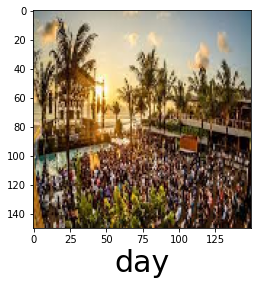

In [33]:
predictImage(r"C:\Users\Tushar\OneDrive\Desktop\Tushar\test\day\image_49.jpg")

[[0.]]


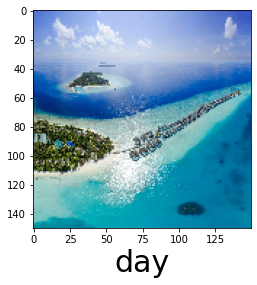

In [34]:
predictImage(r"C:\Users\Tushar\OneDrive\Desktop\Tushar\test\day\image_44.jpg")

[[1.]]


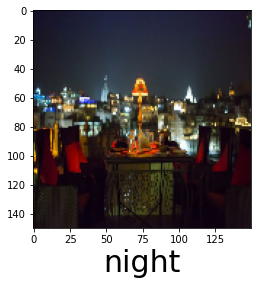

In [35]:
predictImage(r"C:\Users\Tushar\OneDrive\Desktop\Tushar\test\night\image_113.jpg")

[[1.]]


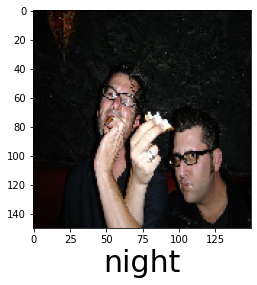

In [42]:
predictImage(r"C:\Users\Tushar\OneDrive\Desktop\Tushar\test\night\image_101.jpg")

By looking at both the models' metrics as declared above it can be seen that 2 layer binary classifier is much more efficient than the efficient net model.The true positives and false positives and false negatives and false positives observed and the conclusion is drawn that the 2 layer binary classifier more efficient than efficient net.